# Decision Tree : Regression

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline  

### Regression

In [30]:
np.random.seed(42) # Fix the random seed

# Create a noisy sinus dataset
def regression_data():
    X = np.sort(6 * np.random.rand(120,1) - 3, axis=0)
    y = np.tanh(X).ravel()
    y[::5] += 3 * (0.5 - np.random.rand(24)) # ajout de bruit
    
    X_test = np.arange(-3.0, 3.0, 0.05)[:, np.newaxis]
    y_test = np.tanh(X_test).ravel()
    return X,y,X_test,y_test

In [31]:
X,y, X_test,y_test = regression_data()

In [32]:
X.shape

(120, 1)

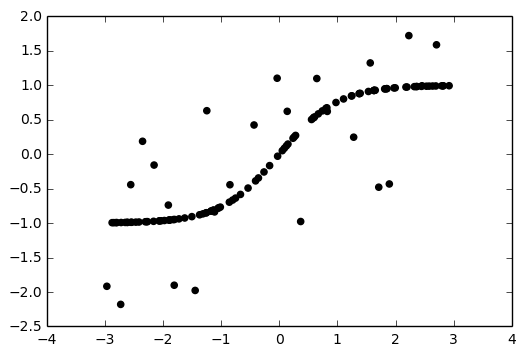

In [33]:
plt.scatter(X, y, c="k")

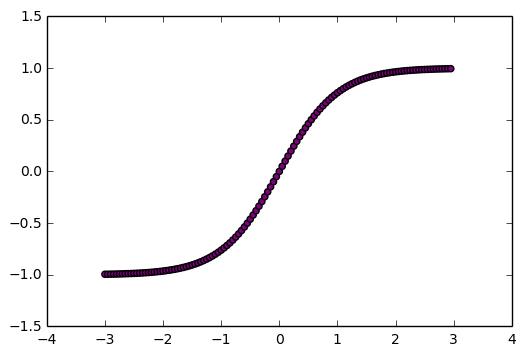

In [34]:
plt.scatter(X_test, y_test, c="purple")

#### Regression score: 

In [35]:
def score_regression_MSE(y_pred, y_true):
    return np.linalg.norm(y_pred - y_true) / len(y_pred)

def score_regression_MAE(y_pred, y_true):
    return np.mean(np.absolute(y_pred - y_true))

In [36]:
def regsin(x):
    return np.sin(x)

In [37]:
score_regression_MSE(regsin(X), y)

1.1667980396566153

In [38]:
score_regression_MAE(regsin(X), y)

0.93359298748333253

### Decision Tree
http://scikit-learn.org/stable/modules/tree.html

In [39]:
from sklearn import tree

In [40]:
clf = tree.DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1) 

In [41]:
clf.fit(X, y) # Entraîne le classifieur sur les données

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [42]:
y_pred = clf.predict(X)
score_train = score_regression_MAE(y_pred, y)
print('score_train = ', score_train)

('score_train = ', 2.9248133913179856e-05)


In [43]:
y_pred_test = clf.predict(X_test)
score_test = score_regression_MAE(y_pred_test, y_test)
print('score_test =', score_test)

('score_test =', 0.17990416225649924)


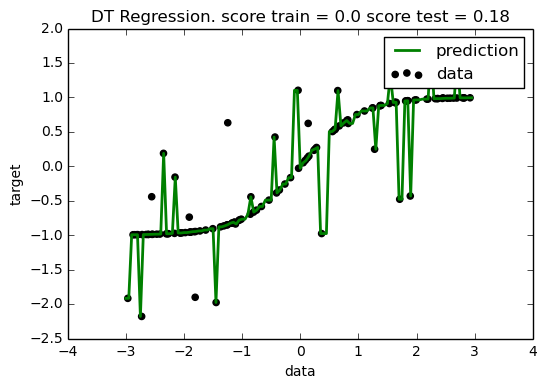

In [44]:
# Plot the results
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_pred_test, c="g", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("DT Regression. score train = " + str(np.round(score_train,3)) +\
        " score test = " + str(np.round(score_test,3)))
plt.legend()

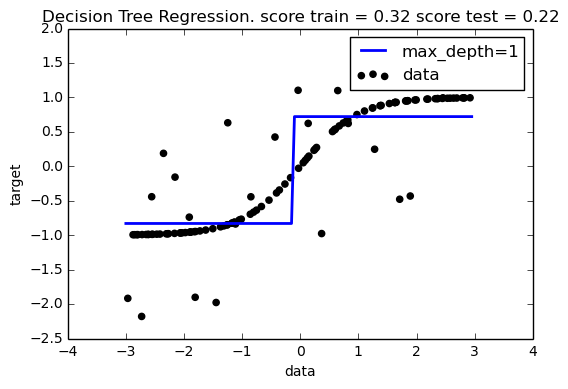

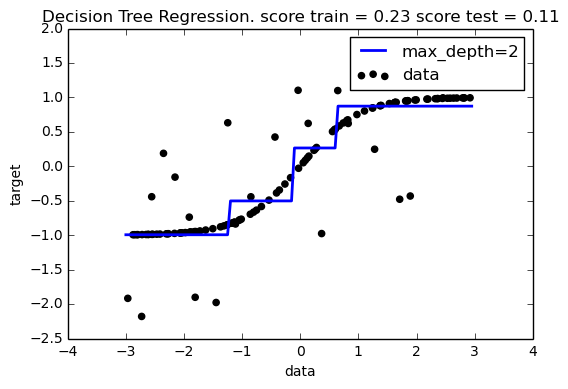

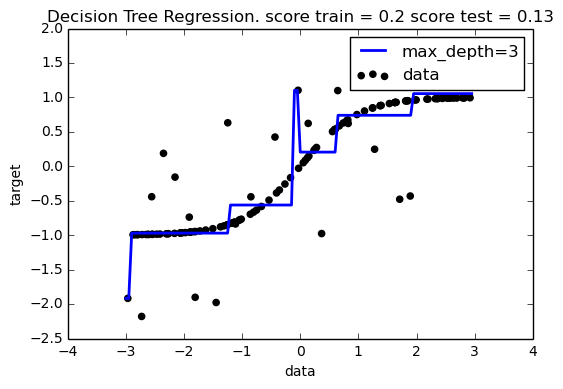

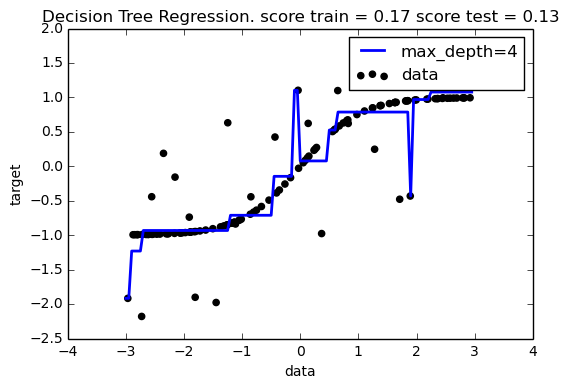

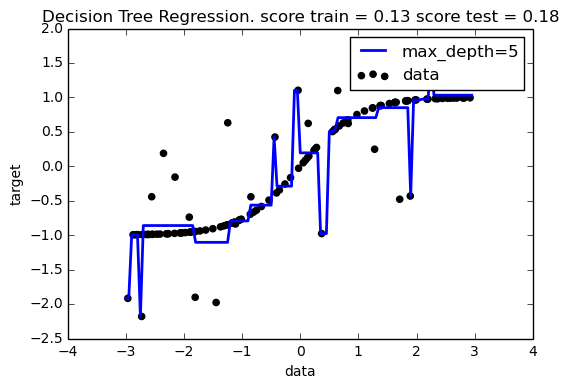

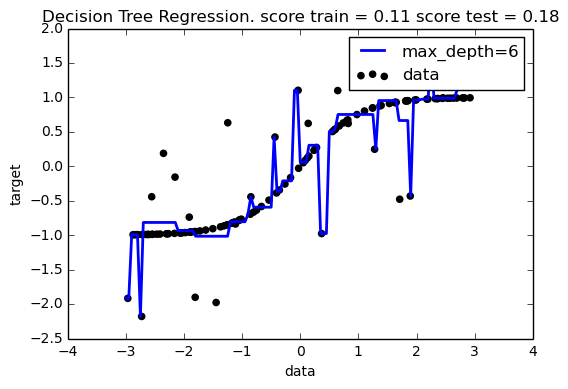

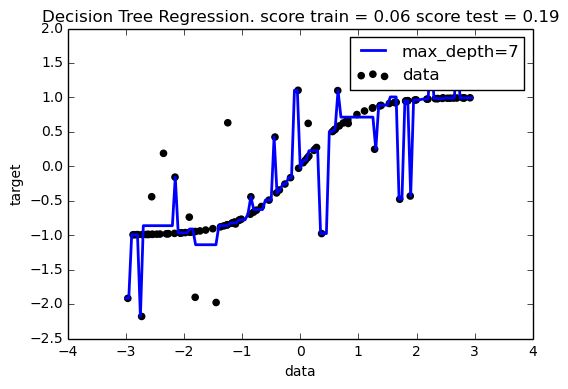

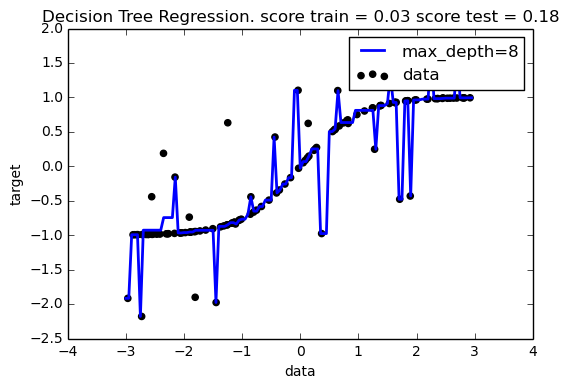

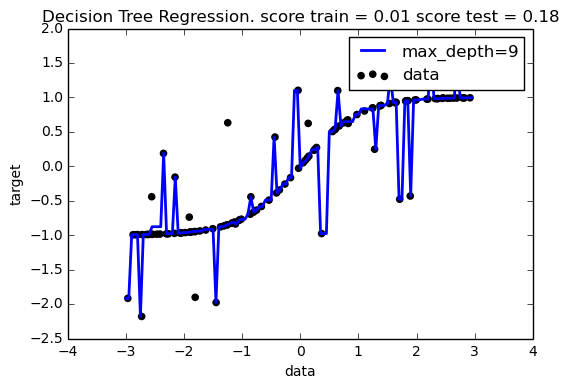

In [45]:
list_score_test = []
list_score_train = []

list_max_depth = np.arange(1,10)
for max_depth in list_max_depth:
    
    # Fit regression model
    clf = tree.DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X, y)
    score_train = score_regression_MAE(clf.predict(X),y)
    list_score_train.append(score_train)

    # Predict
    y_pred_test = clf.predict(X_test)
    score_test = score_regression_MAE(y_pred_test ,y_test)
    list_score_test.append(score_test)

    # Plot the results
    plt.figure()
    plt.scatter(X, y, c="black", label="data")
    plt.plot(X_test, y_pred_test, c="blue", label="max_depth="+str(max_depth), linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression. score train = " + str(np.round(score_train,2)) +\
            " score test = " + str(np.round(score_test,2)))
    plt.legend()
    plt.show()

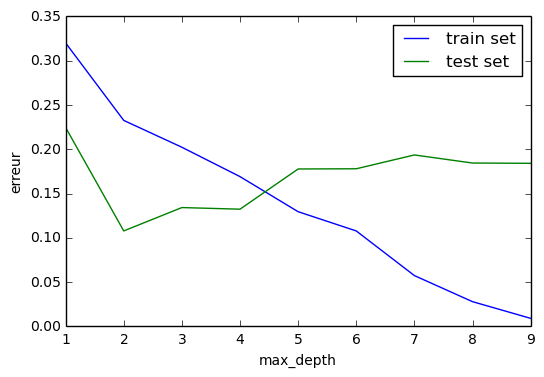

In [46]:
plt.plot(list_max_depth, list_score_train, label = 'train set')
plt.plot(list_max_depth, list_score_test, label = 'test set')
plt.xlabel('max_depth')
plt.ylabel('erreur')
plt.legend()

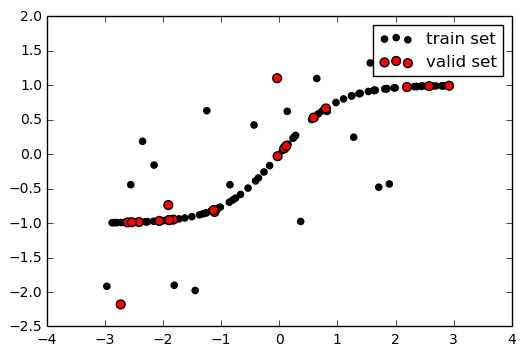

In [47]:
list_indices = np.arange(X.shape[0])
np.random.shuffle(list_indices)

n_valid = 20
indices_valid = list_indices[:n_valid] 
indices_train = list_indices[n_valid:]

X_train = X[indices_train]
y_train = y[indices_train]

X_valid = X[indices_valid]
y_valid = y[indices_valid]

plt.scatter(X_train, y_train, c='black', label ='train set')
plt.scatter(X_valid, y_valid, c='red', s=40, label = 'valid set')
plt.legend()

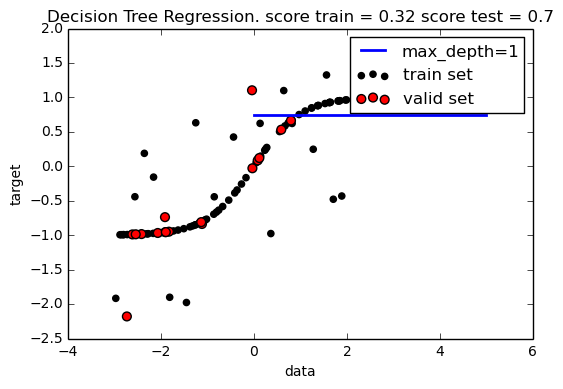

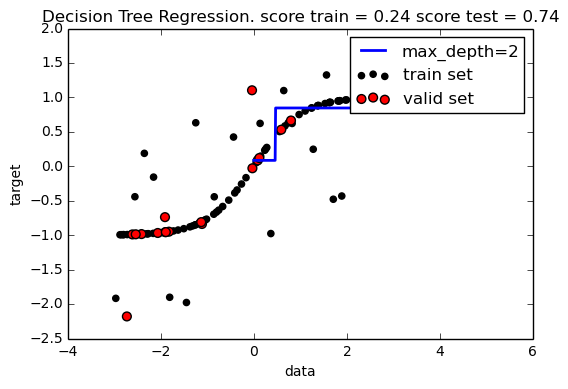

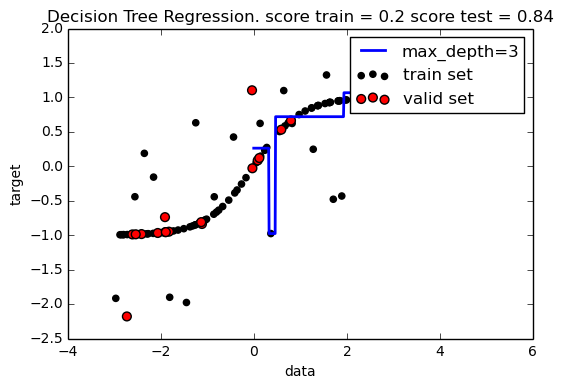

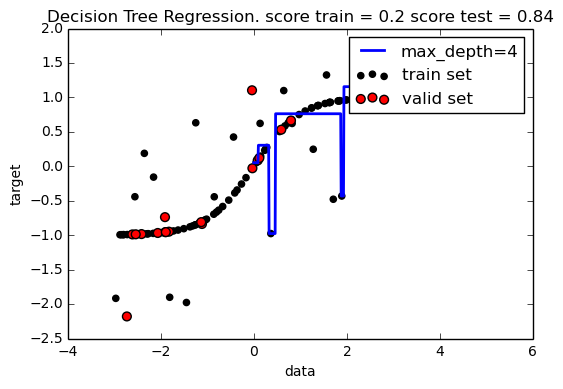

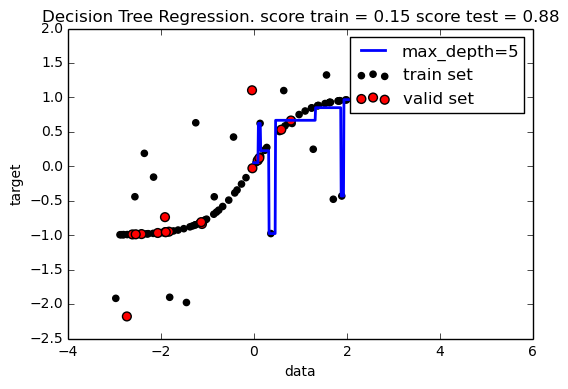

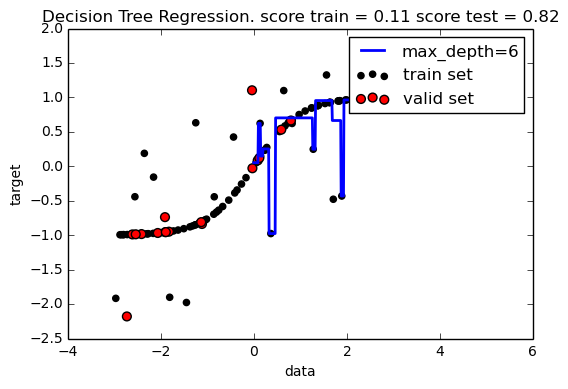

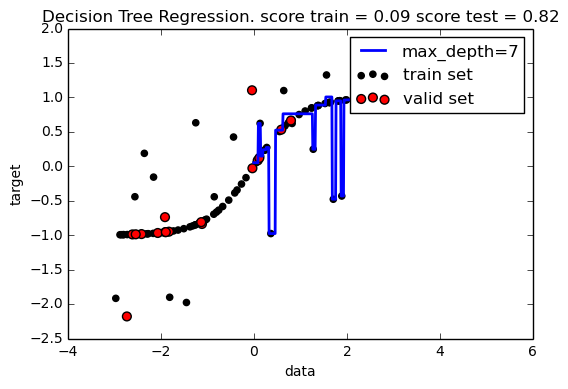

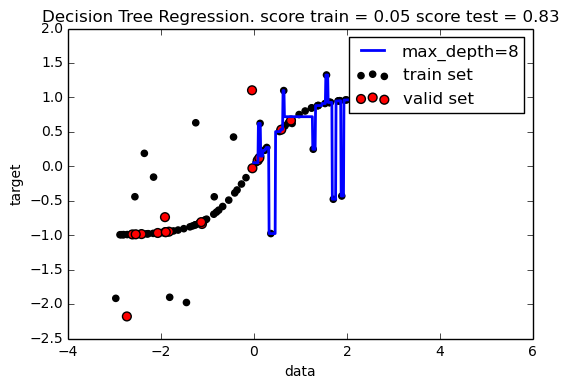

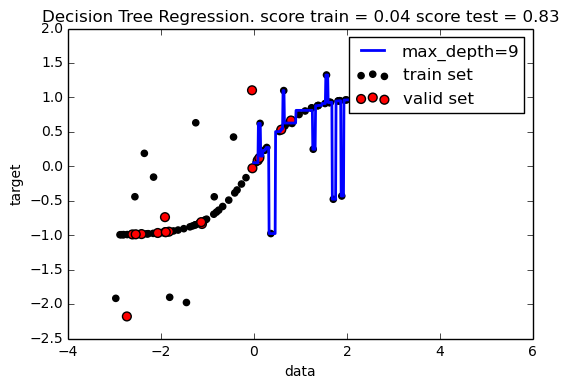

In [48]:
list_score_test = []
list_score_train = []
list_score_valid = []

list_max_depth = np.arange(1,10)
for max_depth in list_max_depth:
    
    # Apprentissage
    clf = tree.DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train)
    score_train = score_regression_MAE(clf.predict(X),y)
    list_score_train.append(score_train)
    
    # Validation
    score_valid = score_regression_MAE(clf.predict(X_valid),y_valid)
    list_score_valid.append(score_valid)

    # Prédiction
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_test = np.sin(X_test)
    y_1 = clf.predict(X_test)
    score_test = score_regression_MAE(clf.predict(X_test),y_test)
    list_score_test.append(score_test)

    # Affichage des résultats
    plt.figure()
    plt.scatter(X, y, c="black", label="train set")
    plt.scatter(X_valid, y_valid, c='red', s=40, label = 'valid set')
    plt.plot(X_test, y_1, c="blue", label="max_depth="+str(max_depth), linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression. score train = " + str(np.round(score_train,2)) +\
            " score test = " + str(np.round(score_test,2)))
    plt.legend()
    plt.show()

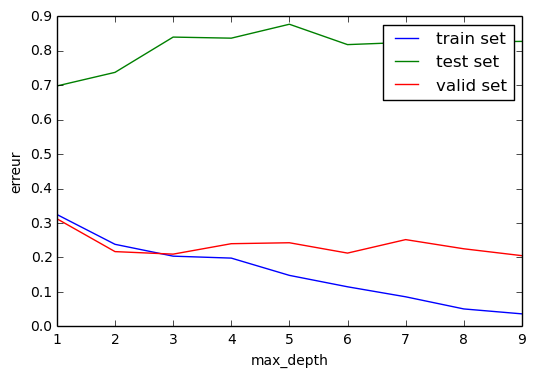

In [49]:
plt.plot(list_max_depth, list_score_train, label = 'train set')
plt.plot(list_max_depth, list_score_test, label = 'test set')
plt.plot(list_max_depth, list_score_valid, label = 'valid set')
plt.xlabel('max_depth')
plt.ylabel('erreur')
plt.legend()